In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def cp_from_params(torque = None, omega = None, density = None, area = None, wind_velocity = None, ct = None, tip_speed_ratio = None):
    if torque != None and omega != None and density != None and area != None and wind_velocity != None:
        return torque*omega/(0.5*density*area*(wind_velocity**3))
    elif ct != None and tip_speed_ratio != None:
        return ct*tip_speed_ratio
    else:
        raise Exception("Incompatible parameters")

In [3]:
def ct_from_params(torque = None, omega = None, density = None, area = None, wind_velocity = None, radius = None, cp = None, tip_speed_ratio = None):
    if torque != None and omega != None and density != None and area != None and wind_velocity != None and radius != None:
        return torque/(0.5*density*area*(wind_velocity**2)*radius)
    elif cp != None and tip_speed_ratio != None:
        return cp/tip_speed_ratio
    else:
        raise Exception("Incompatible parameters")

In [4]:
def available_power(density, area, wind_velocity):
    return 0.5*density*area*(wind_velocity**3)

In [5]:
def ideal_cp(tip_speed_ratio):
    return 16/27*np.exp(-0.35*tip_speed_ratio**-1.29)

In [6]:
def max_cp(tip_speed_ratio, n_blades, phi, cd, cl):
    return 16/27*((1-1.386/n_blades*np.sin(phi/2))**2)*(np.exp(-0.35*tip_speed_ratio**-1.29)-cd/cl*tip_speed_ratio)

In [7]:
def betz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius):
    return 16*np.pi*max_radius/(9*n_blades*tip_speed_ratio*cl*np.sqrt(4/9+(tip_speed_ratio*radius)**2/(max_radius**2)))

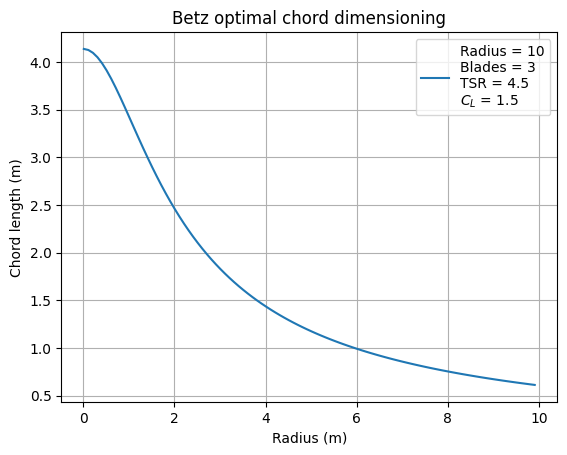

In [8]:
max_radius = 10
n_blades = 3
tip_speed_ratio = 4.5
cl = 1.5
radius = np.arange(0.01, 10, 0.1)
chord_betz = betz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_betz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
plt.title("Betz optimal chord dimensioning")
plt.xlabel("Radius (m)")
plt.ylabel("Chord length (m)")
plt.legend()
plt.grid()
plt.show()

In [8]:
def schmitz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius):
    return 16*np.pi*radius*(np.sin(np.arctan(max_radius/(tip_speed_ratio*radius))/3)**2)/(n_blades*cl)

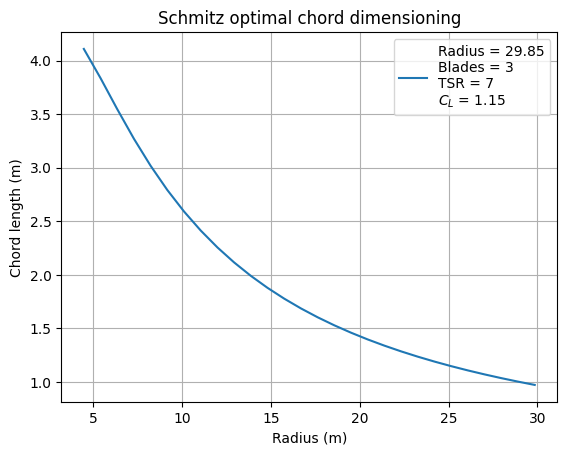

In [9]:
max_radius = 29.85
min_radius = 4.4775
n_blades = 3
tip_speed_ratio = 7
cl = 1.15
radius = np.linspace(min_radius, max_radius, 28)
chord_schmitz = schmitz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_schmitz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
plt.title("Schmitz optimal chord dimensioning")
plt.xlabel("Radius (m)")
plt.ylabel("Chord length (m)")
plt.legend()
plt.grid()
plt.show()

In [10]:
list(zip(radius, chord_schmitz))

[(4.4775, 4.10858418768309),
 (5.417222222222223, 3.836207429971314),
 (6.356944444444444, 3.5465705461747454),
 (7.296666666666667, 3.2699845513555394),
 (8.23638888888889, 3.0175036831701822),
 (9.176111111111112, 2.7915633084986093),
 (10.115833333333335, 2.590992243519324),
 (11.055555555555557, 2.4133045276525134),
 (11.99527777777778, 2.2557148260632345),
 (12.935000000000002, 2.115563351840622),
 (13.874722222222225, 1.9904711898400431),
 (14.814444444444447, 1.8783755889710356),
 (15.754166666666666, 1.7775147551426376),
 (16.69388888888889, 1.6863941700013358),
 (17.63361111111111, 1.6037488156522808),
 (18.573333333333334, 1.5285073881307532),
 (19.513055555555557, 1.4597607192847635),
 (20.45277777777778, 1.3967348775824115),
 (21.392500000000002, 1.3387686756186576),
 (22.332222222222224, 1.2852950427137109),
 (23.271944444444447, 1.2358256674404944),
 (24.21166666666667, 1.1899383531866143),
 (25.151388888888892, 1.1472666011078507),
 (26.091111111111115, 1.107491012093031

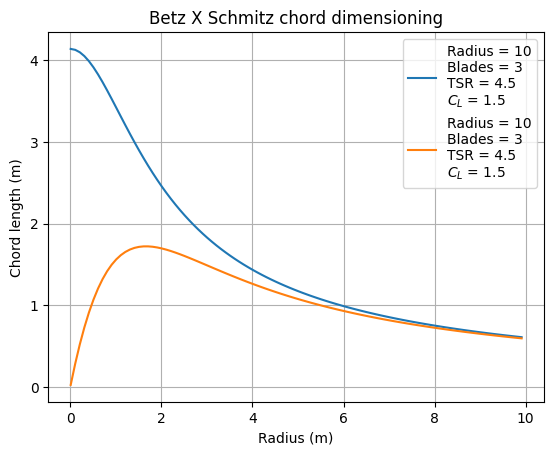

In [11]:
chord_betz = betz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_betz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
chord_schmitz = schmitz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_schmitz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
plt.title("Betz X Schmitz chord dimensioning")
plt.xlabel("Radius (m)")
plt.ylabel("Chord length (m)")
plt.legend()
plt.grid()
plt.show()